![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.0em;">

<b>Questão 1:</b> <br>

a) Simule o modelo de neurônio por 3 s com um degrau de corrente I = 221 pA “ligada”
em t = 0,5 s e “desligada” em t = 2,5 s. Coloque os seus resultados em uma figura
composta por três gráficos, um dando a corrente aplicada I em função do tempo, outro
dando o potencial de membrana V em função do tempo, e o terceiro dando a corrente
de adaptação u em função do tempo. Faça com que os gráficos fiquem um em cima do
outro para facilitar a comparação.<br>
</div>

In [1]:
from scipy.integrate import odeint
import warnings
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

warnings.filterwarnings("ignore", category=RuntimeWarning)

from AdEx import AdEx

100%|██████████| 3000/3000 [00:00<00:00, 29930.74it/s]


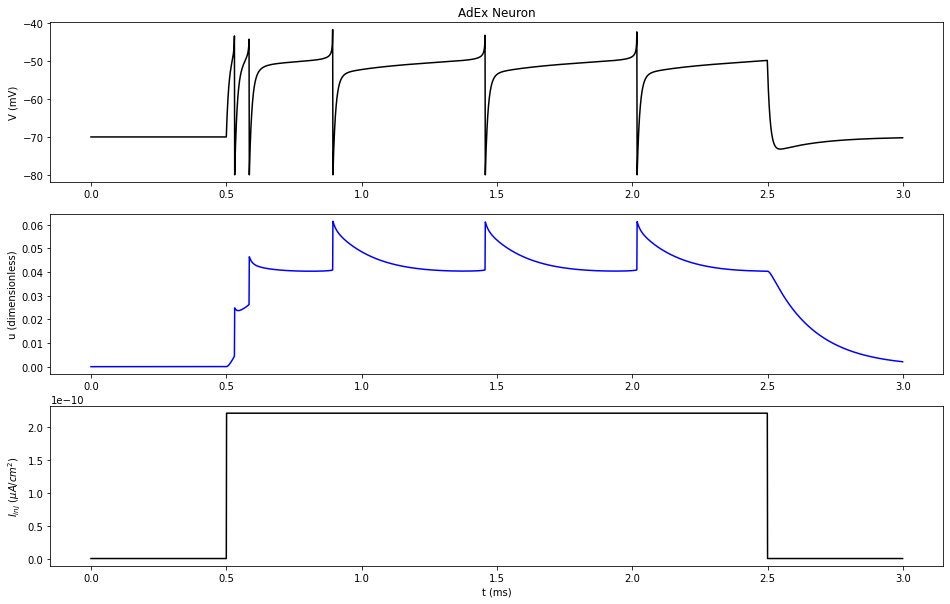

In [2]:
runner = AdEx(exp_time=3.0)
_ = runner.run(J=[221e-12], times=[(0.5, 2.5)])

<div style="font-family: Times New Roman; font-size: 1.0em;">

b) Agora simule o modelo por 5 s usando 20 valores diferentes de corrente constante injetada
I (a partir de t = 0). Use valores de I entre 200 e 500 pA. Para cada corrente aplicada,
calcule o primeiro intervalo entre disparos (T 1 = t 2 − t 1 na notação das notas de aula)
e o intervalo entre disparos do regime estacionário (T ∞ ). Faça um gráfico mostrando as
curvas f-I obtidas pelo inverso de T 1 (f 1 ) e pelo inverso de T ∞ (f ∞ ), representadas por
sı́mbolos ou cores diferentes.<br>
</div>

In [3]:
def calc_T1(spikes):
    if len(np.argwhere(spikes == 1)) < 2:
        return 0
    t1 = np.argwhere(spikes == 1)[0][0]
    t2 = np.argwhere(spikes == 1)[1][0]
    return t2 - t1

In [4]:
def calc_Tinf(spikes):
    if len(np.argwhere(spikes == 1)) < 2:
        return 0
    t1 = np.argwhere(spikes == 1)[-2][0]
    t2 = np.argwhere(spikes == 1)[-1][0]
    return t2 - t1

In [5]:
inj_values = np.arange(200e-12, 500e-12, 15e-12)

runner = AdEx(exp_time=5.0)

T1_all = []
Tinf_all = []

for i in inj_values:
    V, u, spikes, _ = runner.run(J=[i], times=[(0.5, 2.5)], plot=False)
    T1 = calc_T1(spikes)
    Tinf = calc_Tinf(spikes)

    if T1 != 0:
        T1 = 1 / T1

    if Tinf != 0:
        Tinf = 1 / Tinf

    T1_all.append(T1)
    Tinf_all.append(Tinf)

100%|██████████| 5000/5000 [00:00<00:00, 37488.37it/s]


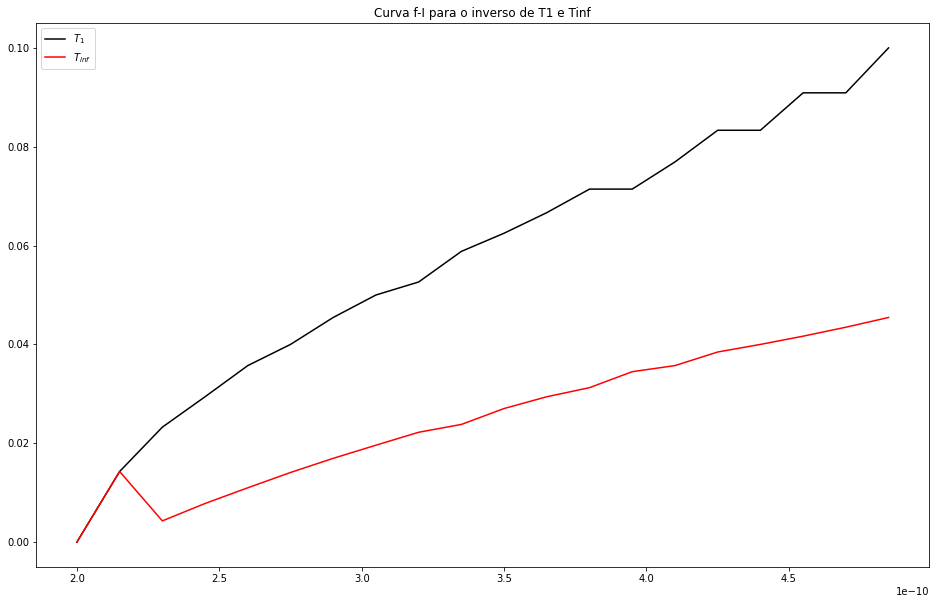

In [6]:
plt.figure(figsize=(16, 10))
plt.plot(inj_values, T1_all, "k", label="$T_{1}$")
plt.plot(inj_values, Tinf_all, "r", label="$T_{inf}$")
plt.legend()
plt.title("Curva f-I para o inverso de T1 e Tinf")
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.0em;">

<b>Questão 2:</b> <br>

a) Escolha pelo menos três dos padrões de disparo listados na tabela do livro de Gerstner et
al. e use os valores dos parâmetros dados (incluindo o degrau de corrente I) para simular
o neurônio AdEx e tente replicar os padrões de disparo correspondentes mostrados na
Figura 6.2 do livro. Como Gerstner et al. não dão um valor de V pico em seu livro, use
V pico = 20 mV.<br>
</div>

In [7]:
spike_pattern = {
    "Tonic": {
        "Tm": 20e-3,
        "a": 0,
        "tau_u": 30e-3,
        "b": 60e-12,
        "v_init": -55e-3,
        "R": 500e6,
    },
    "Adapting": {
        "Tm": 20e-3,
        "a": 0,
        "tau_u": 100e-3,
        "b": 5e-12,
        "v_init": -55e-3,
        "R": 500e6,
    },
    "Bursting": {
        "Tm": 5e-3,
        "a": -0.5e-9,
        "tau_u": 100e-3,
        "b": 7e-12,
        "v_init": -46e-3,
        "R": 500e6,
    },
}

100%|██████████| 1000/1000 [00:00<00:00, 30387.78it/s]


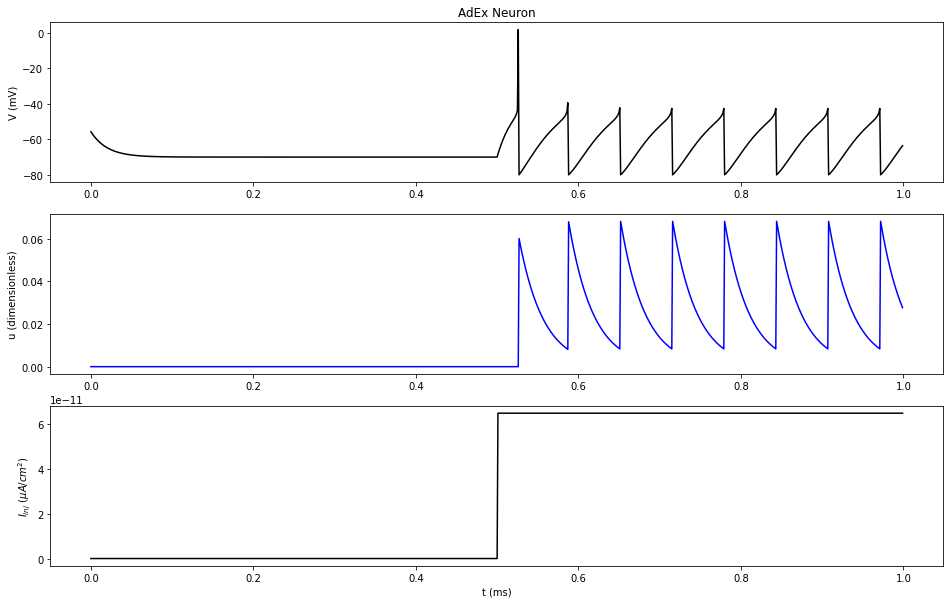

pattern: Tonic


100%|██████████| 1000/1000 [00:00<00:00, 33323.04it/s]


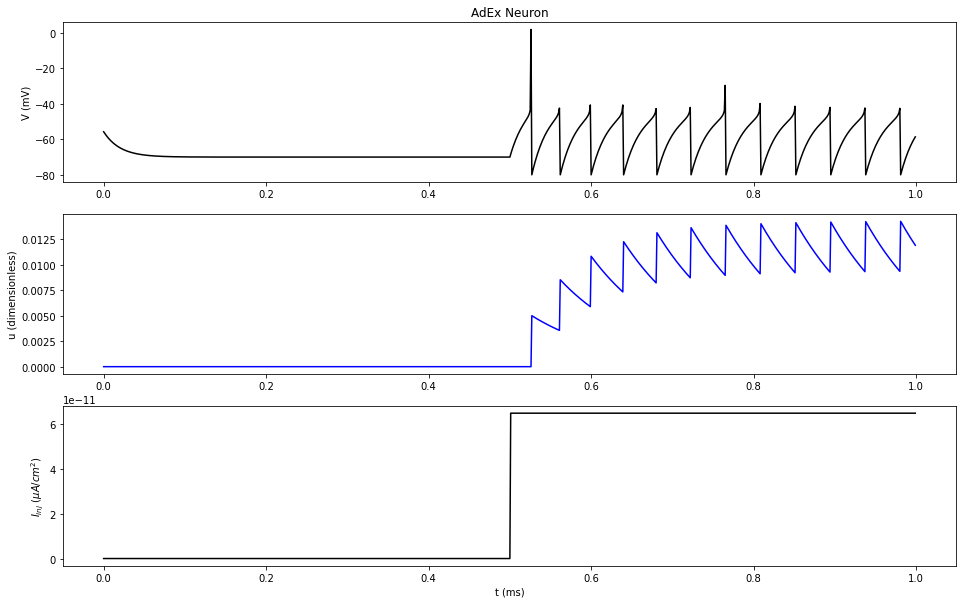

pattern: Adapting


100%|██████████| 1000/1000 [00:00<00:00, 35490.81it/s]


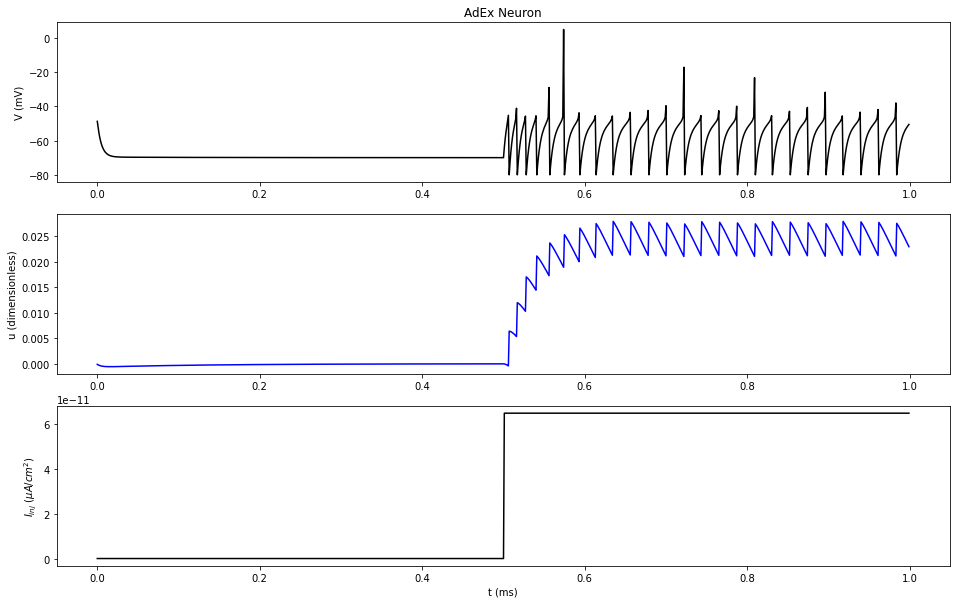

pattern: Bursting


In [8]:
for pattern, params in spike_pattern.items():
    C = params["Tm"] / params["R"]
    G = 1 / params["R"]
    a = params["a"]
    b = params["b"]
    tau_u = params["tau_u"]
    v_init = params["v_init"]

    runner = AdEx(exp_time=1.0, C=C, G=G, V_pico=20e-3, a=a, b=b, tau_u=tau_u)
    X = runner.run(J=[65e-12], V_init=v_init, times=[(0.5, 2.5)])
    print(f"pattern: {pattern}")

<div style="font-family: Times New Roman; font-size: 1.0em;">

b) Para pelo menos um dos padrões de disparo simulados no item anterior, faça uma análise
completa do sistema no plano de fase.<br>

(i) Para I = 0, trace as nulclinas de V e u no plano de fase e determine os pontos
fixos e seus tipos de estabilidade (retrato de fase do sistema). Escolha um valor
de pulso de corrente I = δI suficiente para gerar um potencial de ação e mostre a
trajetória correspondente no plano de fase. Faça também gráficos de V × t e u × t
mostrando o comportamento temporal de V e u provocado pelo pulso. <br>
</div>

In [9]:
from nullclines import plot_phase_diagram

ModuleNotFoundError: No module named 'nullclines'

In [ ]:
params = {
    "G": 1 / 500e6,
    "V_r": -0.07,
    "delta_L": 0.002,
    "V_L": -0.05,
    "a": -0.5e-9,
    "I": 21e-12,
}

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7170800995577D+02   r2 =  0.6088041216157D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7170800995577D+02   r2 =  0.6088041216157D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7170800995577D+02   r2 =  0.4919944638978D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7170800995577D+02   r2 =  0.4919944638978D-14
 lsoda--  warning..internal t (=r1) 

/home/rafael/.virtualenvs/redes_complexas/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


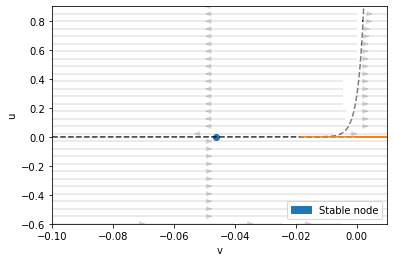

In [ ]:
plot_phase_diagram(params)

<div style="font-family: Times New Roman; font-size: 1.0em;">
(ii) Escolha um degrau de corrente constante injetada I (diferente do usado no item
(a) acima) que produza disparos no neurônio e faça um gráfico do plano de fase
mostrando a nulclina de u e a nova posição da nulclina de V , identificando os
pontos fixos e seus tipos de estabilidade (retrato de fase). Mostre a trajetória do
sistema no plano de fase, identificando os pontos de redefinição do sistema após os
disparos. Gere gráficos de V × t e u × t correspondentes ao caso estudado. <br>
</div>

In [ ]:
params = {
    "G": 1 / 500e6,
    "V_r": -0.07,
    "delta_L": 0.002,
    "V_L": -0.05,
    "a": -0.5e-9,
    "I": 221e-12,
}

/home/rafael/.virtualenvs/redes_complexas/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1540811943550D+03   r2 =  0.1419559001263D-13
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1540811943550D+03   r2 =  0.1419559001263D-13
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1540811943550D+03   r2 =  0.1147290203483D-13
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1540811943550D+03   r2 =  0.1147290203483D-13
 lsoda--  warning..internal t (=r1) 

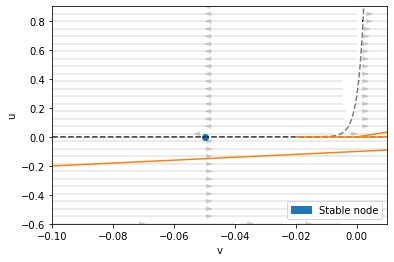

In [ ]:
plot_phase_diagram(params)

<div style="font-family: Times New Roman; font-size: 1.0em;">
(iii) Explique, em suas próprias palavras, os comportamentos observados nos itens (i)
e (ii). <br>
</div>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.0em;">

<b>Questão 3:</b> <br>

a) Use os seguintes valores para os parâmetros das equações (4), (5) e (6): C = 150 pF,
v r = −75 mV, v L = −45 mV, k = 1,2, a = 0,01, b = 5, c = −56 mV, d = 130 e v pico = 50
mV.<br>

(i) Faça I = 0 e determine o retrato de fase do sistema, contendo as nulclinas de v e
u, seus pontos fixos e correspondentes tipos de estabilidade.<br>
</div>